<a href="https://colab.research.google.com/github/ansam304/Prediction-of-Product-Sales/blob/main/Prediction_of_Poduct_Sales_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: (Prediction of Product Sales)
 - Auther: Ansam Aslan









 ## Project Overview


`This project focuses on sales prediction for food items sold at various stores. The main goal is to help retailers understand which product and outlet features significantly impact sales performance.`

## Data Dictionary

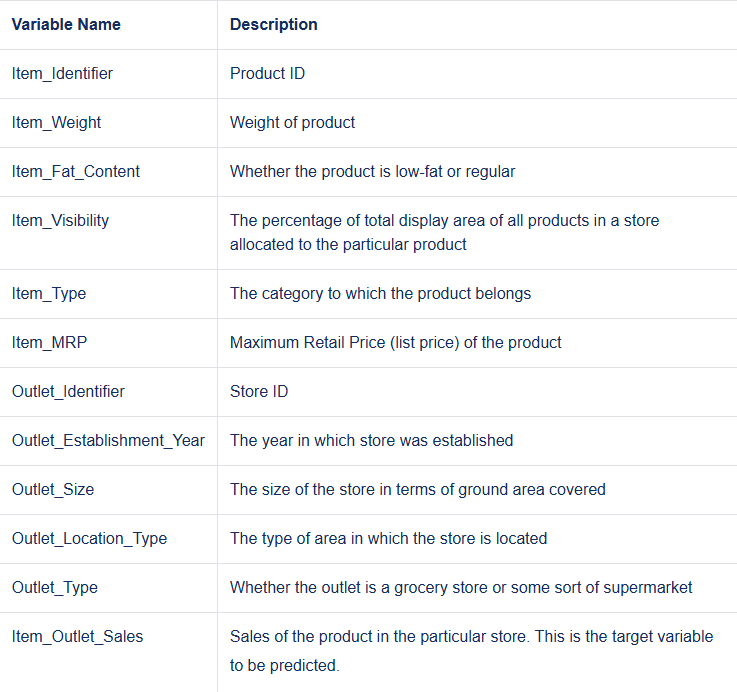

## Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
file="/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df=pd.read_csv(file)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Q1: How many rows and columns?

  - `8523 rows`
  - `12 columns`

 ## Cleaning Data

### Convert Dtypes

In [46]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [47]:
object_col=df.select_dtypes("object").columns
object_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [48]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


Convert Outlet_Identifier

In [49]:
# Inspect the Outlet_Identifier value counts

df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT035,930
OUT049,930
OUT046,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [50]:
# Remove  the "OUT0" from Outlet_Identifier column by replacing it with nothing
df['Outlet_Identifier']=df['Outlet_Identifier'].str.replace("OUT0","")
df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
27,935
13,932
35,930
49,930
46,930
45,929
18,928
17,926
10,555


In [51]:
# Change the datatype of Outlet_Identifier column to int
df['Outlet_Identifier']= df['Outlet_Identifier'].astype(int)
# Confirm the datatype
df['Outlet_Identifier'].dtype

dtype('int64')

Convert Item_Fat_Content

In [52]:
# Inspect the SibspItem_Fat_Content column's value counts
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [53]:
#replaced LF & low fat in Low Fat and reg in Regular
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


###Rename Columns

In the cell below:

 - The Identifier column has been renamed to  "Item_Id"
 - The Outlet_Identifier has been renamed to "Outlet_Id"
 - The Item_MRP has been renamed to "List Price"

In [54]:
rename_dict={"Item_Identifier":"Item_Id", "Outlet_Identifier":"Outlet_Id","Item_MRP":"List Price"}
df=df.rename(rename_dict,axis=1)

df.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,List Price,Outlet_Id,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


### Duplicate Rows

In [55]:
duplicated_rows=df.duplicated(keep=False)
duplicated_rows.sum()

np.int64(0)

There are no duplicate rows

###  Unique Identifiers

In [56]:
df.nunique()

,0
Item_Id,1559
Item_Weight,415
Item_Fat_Content,2
Item_Visibility,7880
Item_Type,16
List Price,5938
Outlet_Id,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


In [57]:
df.nunique()/len(df)*100

,0
Item_Id,18.291681
Item_Weight,4.869178
Item_Fat_Content,0.023466
Item_Visibility,92.455708
Item_Type,0.187727
List Price,69.670304
Outlet_Id,0.117330
Outlet_Establishment_Year,0.105597
Outlet_Size,0.035199
Outlet_Location_Type,0.035199


###  Missing Values

In [58]:
null_sum=df.isna().sum()
null_sum

,0
Item_Id,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
List Price,0
Outlet_Id,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [59]:
null_sum/len(df)*100

,0
Item_Id,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
List Price,0.000000
Outlet_Id,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


<Axes: >

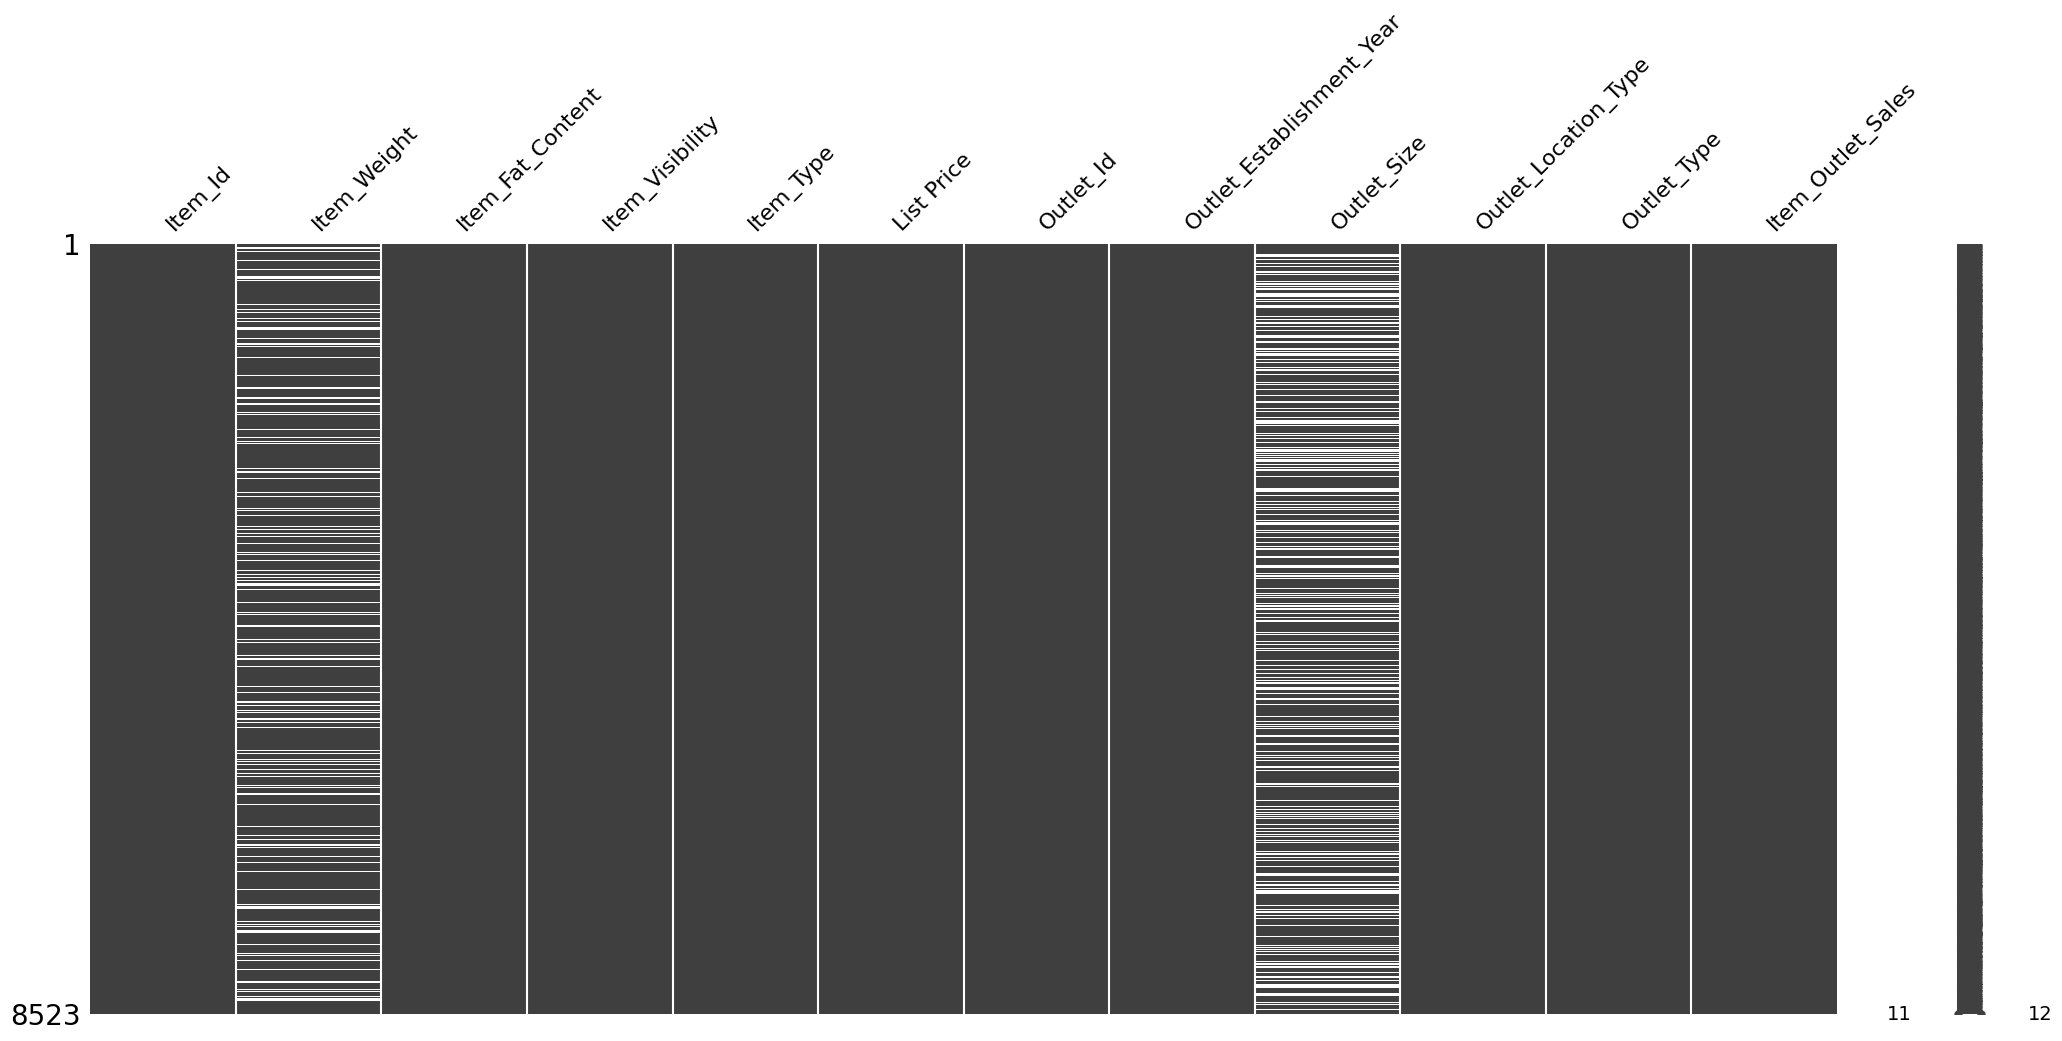

In [60]:
import missingno as msno
msno.matrix(df)

In [61]:
cat_col=df.select_dtypes('object').columns
cat_col

Index(['Item_Id', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [62]:
df[cat_col]=df[cat_col].fillna("MISSING")

In [63]:
num_col=df.select_dtypes('number').columns
num_col

Index(['Item_Weight', 'Item_Visibility', 'List Price', 'Outlet_Id',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [64]:
df[num_col].describe()

,Item_Weight,Item_Visibility,List Price,Outlet_Id,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,29.108765,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,13.927648,8.371760,1706.499616
min,4.555000,0.000000,31.290000,10.000000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,17.000000,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,27.000000,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,45.000000,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,49.000000,2009.000000,13086.964800


In [65]:
Item_Visibility_zero=df['Item_Visibility']==0
Item_Visibility_zero.sum()

np.int64(526)

In [66]:
item_Visibility_mean=df['Item_Visibility'].mean()
item_Visibility_mean

np.float64(0.06613202877895108)

In [67]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0, item_Visibility_mean)

In [68]:
item_weight_mean=df['Item_Weight'].mean()
item_weight_mean

np.float64(12.857645184135976)

In [69]:
df[num_col]=df[num_col].fillna(item_weight_mean)

In [70]:
df.isna().sum()

,0
Item_Id,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
List Price,0
Outlet_Id,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


<Axes: >

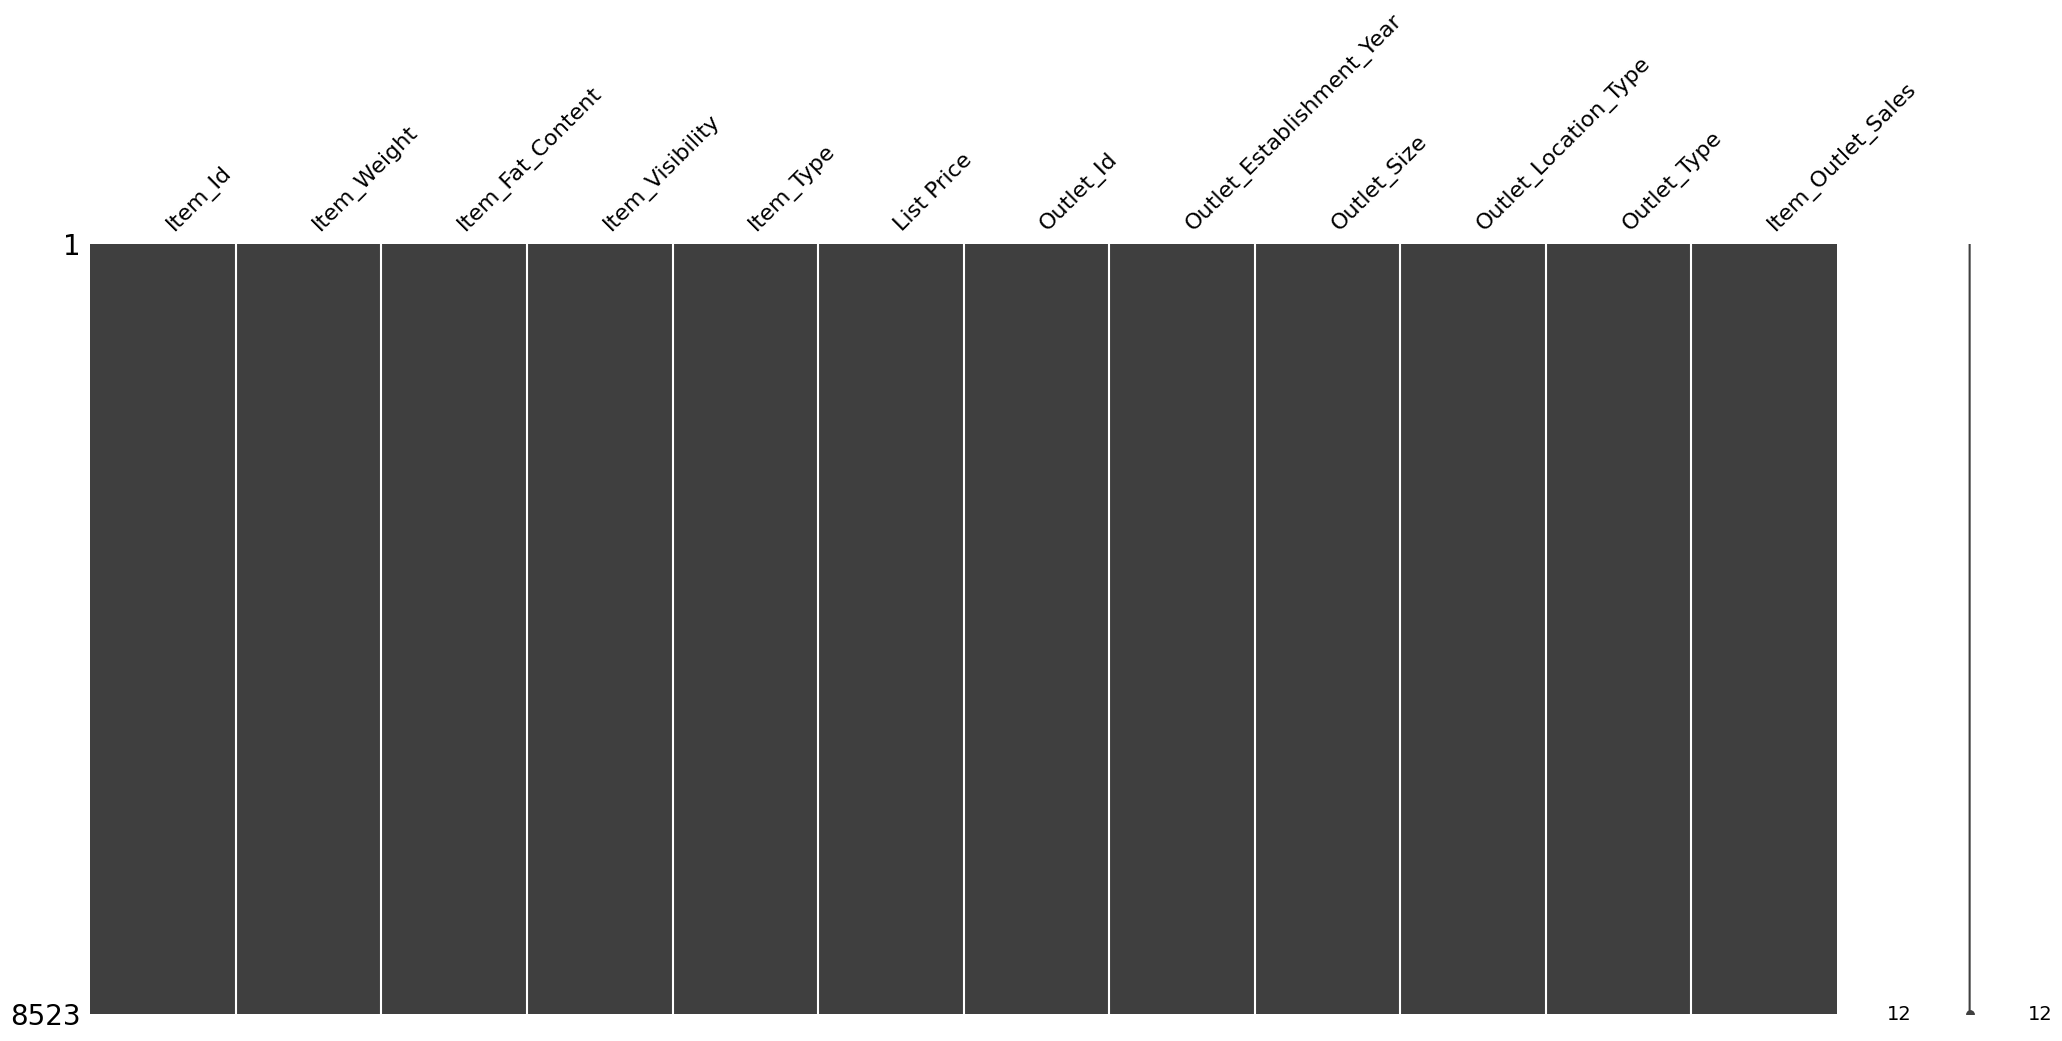

In [71]:
msno.matrix(df)

In [72]:
df.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,List Price,Outlet_Id,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,10,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [73]:
path="/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/Prediction_of_Poduct_Sales_cleaned.csv"
df.to_csv(path,index=False)

In [74]:
dff=pd.read_csv(path)
dff.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,List Price,Outlet_Id,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,10,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


 ## Exploratory Data Analysis

In [75]:
df.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,List Price,Outlet_Id,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,10,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


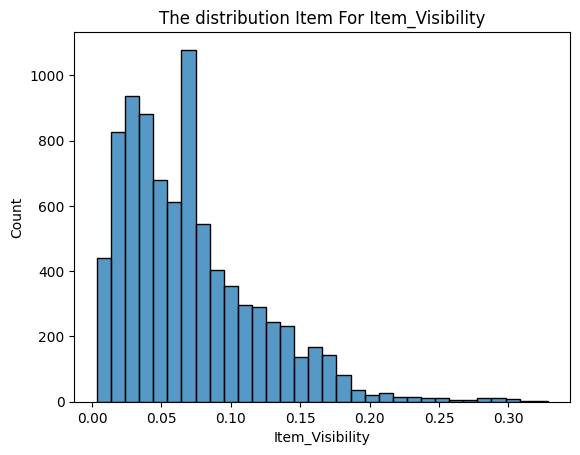

In [76]:
ax=sns.histplot(data=df,x="Item_Visibility",binwidth=.01)
ax.set(title='The distribution Item For Item_Visibility');

`The histogram above shows the distribution of Item Visibility. We notice that items with high visibility are few, while items with low visibility are more frequent.`

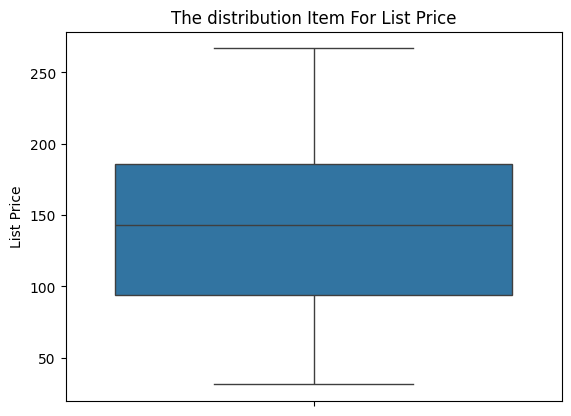

In [77]:
ax=sns.boxplot(data=df,y="List Price")
ax.set(title='The distribution Item For List Price');

`The boxplot above shows the distribution for list price, and we note:`
- `75% of items price between 90 - 185 around.`
- `50% (The median) of items price is around 140`
- `25% of items price is around 90.`
- `The minmium price is around 30.`
- `The maximum price is around 266.`

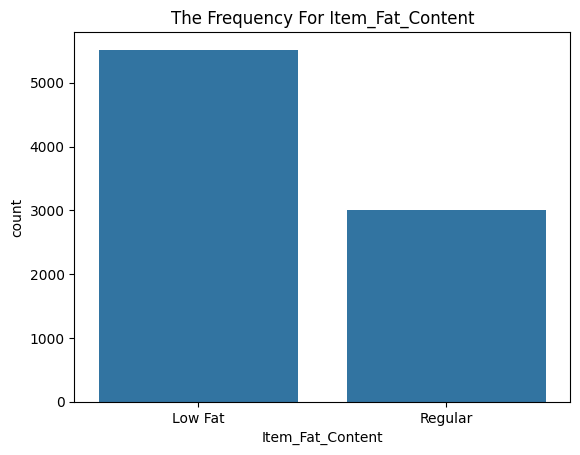

In [78]:
ax=sns.countplot(data=df,x="Item_Fat_Content")
ax.set(title='The Frequency For Item_Fat_Content');

`The countplot above shows the frequency of item fat content. It is clear that 'Low Fat' items are more frequent than 'Regular' items.`

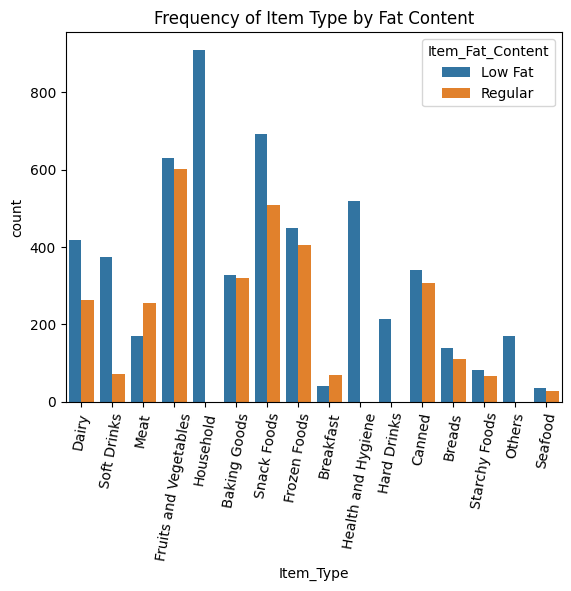

In [79]:
ax=sns.countplot(data=df,x="Item_Type", hue="Item_Fat_Content")
ax.set(title='Frequency of Item Type by Fat Content')
plt.xticks(rotation=80);

`The countplot above shows the frequency of item types by item fat content. We observe that 'Low Fat' items have higher sales compared to 'Regular' items and that some items dont include any regular items .`

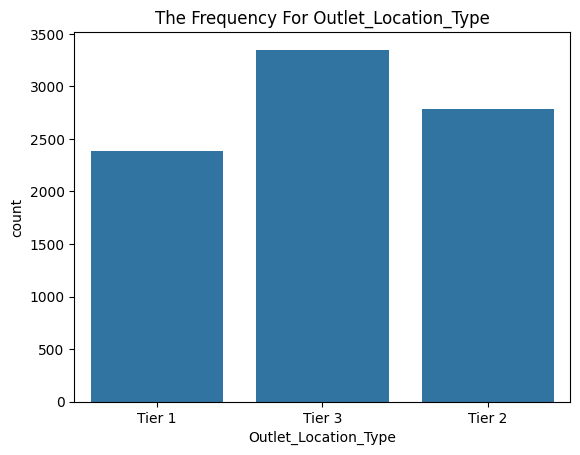

In [80]:
ax=sns.countplot(data=df,x="Outlet_Location_Type")
ax.set(title='The Frequency For Outlet_Location_Type');


`The countplot above shows the frequency of three outlet location types. We note that 'Tier 3' has the highest frequency, followed by 'Tier 2', and 'Tier 1' has the lowest.`

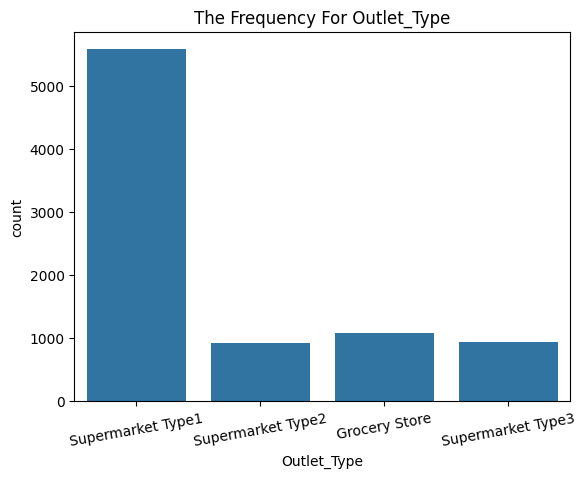

In [81]:
ax=sns.countplot(data=df,x="Outlet_Type")
ax.set(title='The Frequency For Outlet_Type')
plt.xticks(rotation=10);

`The countplot above shows the frequency of four outlet types. We note that "Supermarket Type1" has the highest count, significantly higher than the others. It is followed by "Grocery Store", then "Supermarket Type3", and finally, "Supermarket Type2" has the lowest count.`

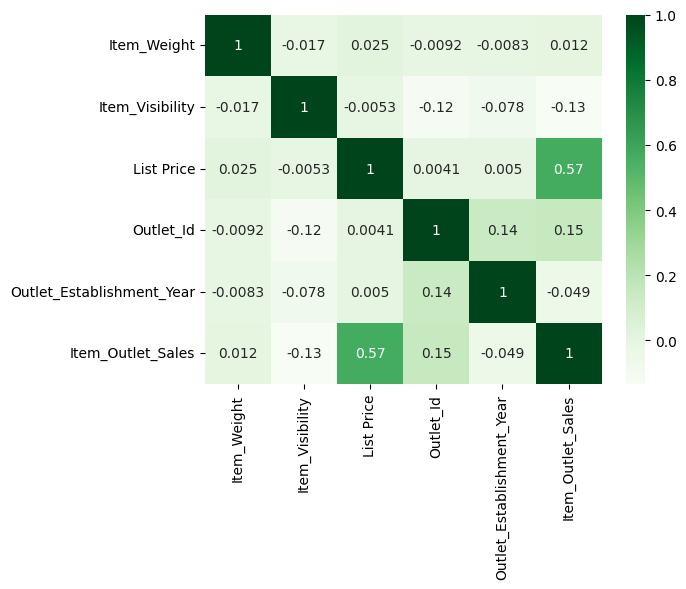

In [82]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,cmap='Greens',annot=True);

`The heatmap above shows the correlation between the columns. We note that the correlation between "List Price" and "Item Outlet Sales" is positive and moderate. There is also a positive but low correlation between "Item Outlet Sales" and "Outlet ID", and a negative and low correlation between "Item Visibility" and "Item Outlet Sales"`

 ## Feature Inspection